In [2]:
! dir

 D 드라이브의 볼륨: data
 볼륨 일련 번호: 6A9A-481F

 D:\lkj\code\ref 디렉터리

2025-02-27  오전 09:31    <DIR>          .
2025-02-27  오전 09:34    <DIR>          ..
2025-02-27  오전 09:24    <DIR>          .ipynb_checkpoints
2025-02-26  오후 03:52         4,185,844 D2Coding-Ver1.3.2-20180524.ttf
2025-02-26  오후 04:48           436,470 인천교통공사_1호선 일별 승하차현황_20240630.csv
2025-02-27  오전 09:28           407,050 인천교통공사_2호선일별승하차현황_20240630.csv
2025-02-26  오후 02:42           819,559 일별역별시간대별승하차인원(2025년1월).csv
               4개 파일           5,848,923 바이트
               3개 디렉터리  614,156,320,768 바이트 남음


In [4]:
import pandas as pd 
file_path = './인천교통공사_2호선일별승하차현황_20240630.csv'
df = pd.read_csv(file_path, encoding ='EUC-KR')
df.head()

,역명,일자,이용인원,승차인원,하차인원
0,검단오류(검단산업단지),2023-06-01,5939,2924,3015
1,왕길,2023-06-01,5337,2680,2657
2,검단사거리,2023-06-01,17334,9047,8287
3,마전,2023-06-01,9345,4552,4793
4,완정,2023-06-01,16736,8660,8076


In [5]:
columns0 = ['name','date','total','ridein','rideout']
columns = columns0
df.columns = columns
df.head()

,name,date,total,ridein,rideout
0,검단오류(검단산업단지),2023-06-01,5939,2924,3015
1,왕길,2023-06-01,5337,2680,2657
2,검단사거리,2023-06-01,17334,9047,8287
3,마전,2023-06-01,9345,4552,4793
4,완정,2023-06-01,16736,8660,8076


In [7]:
data = df.groupby(['name','date']).sum().reset_index() #name,과 date가 같은 칼럼들을 모두 합해주는 sum 
data

,name,date,total,ridein,rideout
0,가재울,2023-06-01,7512,3802,3710
1,가재울,2023-06-02,7747,3995,3752
2,가재울,2023-06-03,4142,2135,2007
3,가재울,2023-06-04,3124,1568,1556
4,가재울,2023-06-05,6759,3446,3313
...,...,...,...,...,...
10687,주안국가산단,2024-06-26,6104,2992,3112
10688,주안국가산단,2024-06-27,6114,3016,3098
10689,주안국가산단,2024-06-28,5944,2910,3034
10690,주안국가산단,2024-06-29,1467,708,759


In [9]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
0,가재울,2023-06-01,7512
1,가재울,2023-06-02,7747
2,가재울,2023-06-03,4142
3,가재울,2023-06-04,3124
4,가재울,2023-06-05,6759
5,가재울,2023-06-06,3879
6,가재울,2023-06-07,7683
7,가재울,2023-06-08,7378
8,가재울,2023-06-09,7586
9,가재울,2023-06-10,4546


In [10]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가재울,2654982
1,가정(루원시티),7844967
2,가정중앙시장,4378793
3,검단사거리,5953919
4,검단오류(검단산업단지),1785451
5,검바위,2285870
6,검암,2783039
7,남동구청,3095779
8,독정,3011988
9,마전,2956676


In [11]:
sdata = tdata.sort_values(by='total',ascending=False) #ascending =False 오름차순의 거짓 = 내림차순 
sdata.head(20)

,name,total
1,가정(루원시티),7844967
17,시민공원(문화창작지대),6901401
3,검단사거리,5953919
12,서구청,5808683
11,모래내시장,5700493
25,주안,5680916
19,완정,5257684
2,가정중앙시장,4378793
10,만수,3582079
18,아시아드경기장(공촌사거리),3274388


In [13]:
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 

d2_path = "./D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

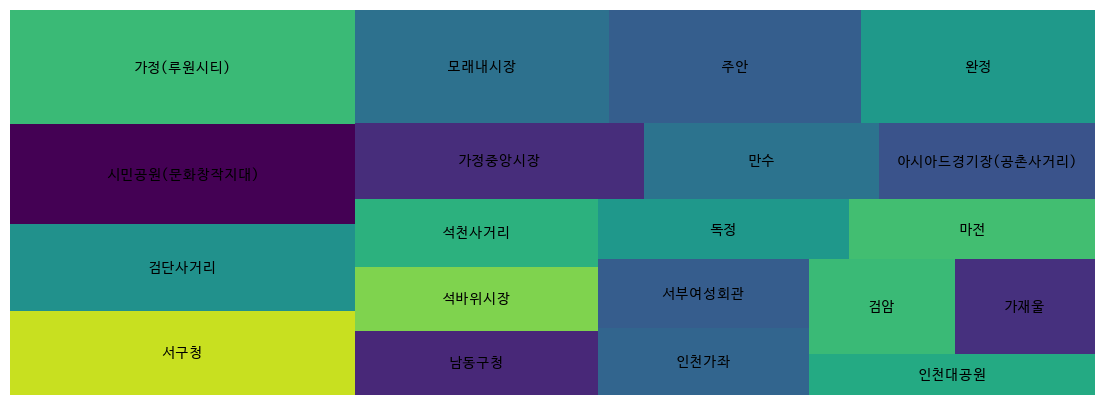

In [14]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=sdata['total'].iloc[:20],label=sdata['name'].iloc[:20])
plt.rcParams['font.size'] = 8
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()